In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

c:\Users\pujas\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Filter for Data Analyst jobs in the United States
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg']) # Drop rows where salary_year_avg is NaN

df_da_us['salary_year_avg'].sample(10) # Display a sample of the salary_year_avg column

485263     52000.0
292166     77500.0
581429    120624.0
22019      75000.0
737139    109159.0
262306     90000.0
222957    105000.0
556577     45000.0
475193     73592.0
539709     75000.0
Name: salary_year_avg, dtype: float64

<Axes: >

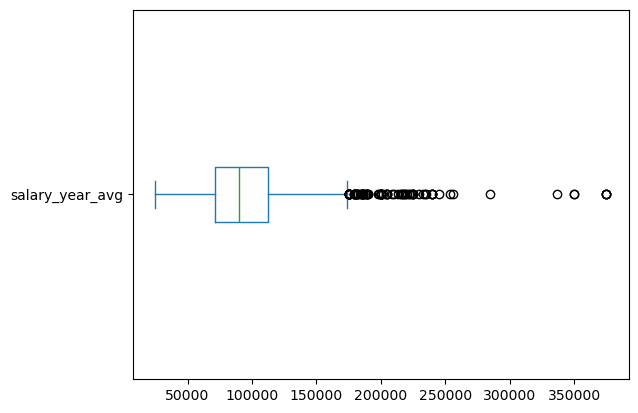

In [3]:
df_da_us['salary_year_avg'].plot(kind='box',vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x12a367b3c10>,
 'caps': [<matplotlib.lines.Line2D at 0x12a368ad210>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a19447f50>],
 'medians': [<matplotlib.lines.Line2D at 0x12a368ae990>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a368af450>],
 'means': []}

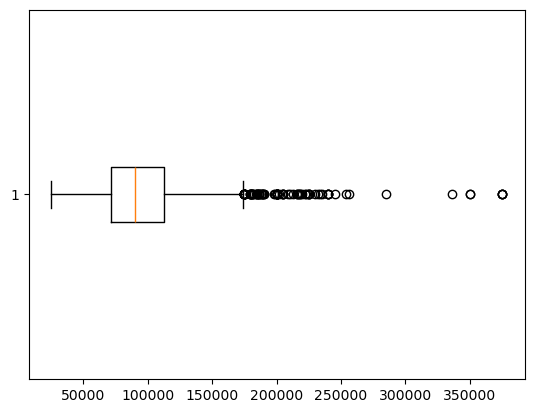

In [4]:
plt.boxplot(df_da_us['salary_year_avg'], vert=False) # Create a horizontal boxplot

C:\Users\pujas\AppData\Local\Temp\ipykernel_12764\2296598859.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, vert=False, labels=job_titles)


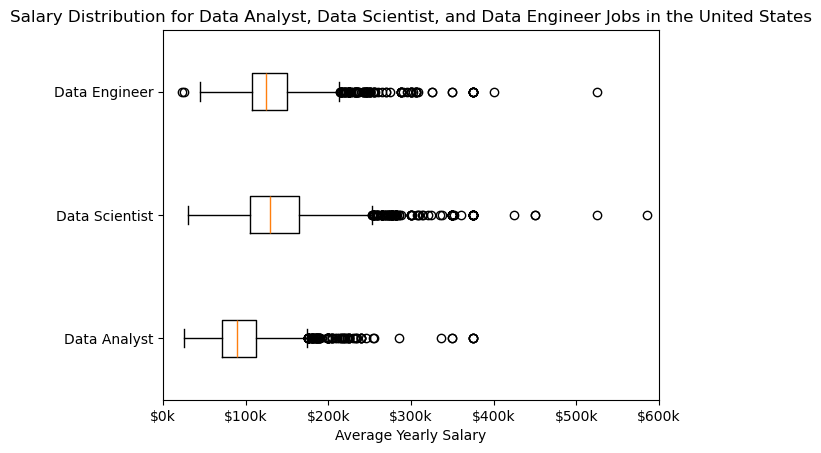

In [5]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()
df_us = df_us.dropna(subset=['salary_year_avg']) # Drop rows where salary_year_avg is NaN

job_list = [df_us[df_us['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

plt.boxplot(job_list, vert=False, labels=job_titles)
plt.title('Salary Distribution for Data Analyst, Data Scientist, and Data Engineer Jobs in the United States')
plt.xlabel('Average Yearly Salary')
ax = plt.gca() # Get current axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k')) # Format x-axis labels as currency
plt.xlim(0, 600000)
plt.show()
